# Kompresija podataka

---

QR rastav s pivotiranjem stupaca možemo koristiti za __kompresiju (sažimanje) podataka__.

Dijagonalni elementi matrice $R$ padaju po apsolutnoj vrijednosti pa možemo odrezati djelove matrica $Q$ i $R$ za koje smatramo da nisu značajni.

Dat ćemo primjer kompresije slike.

In [1]:
using Images
using LinearAlgebra
using Plots

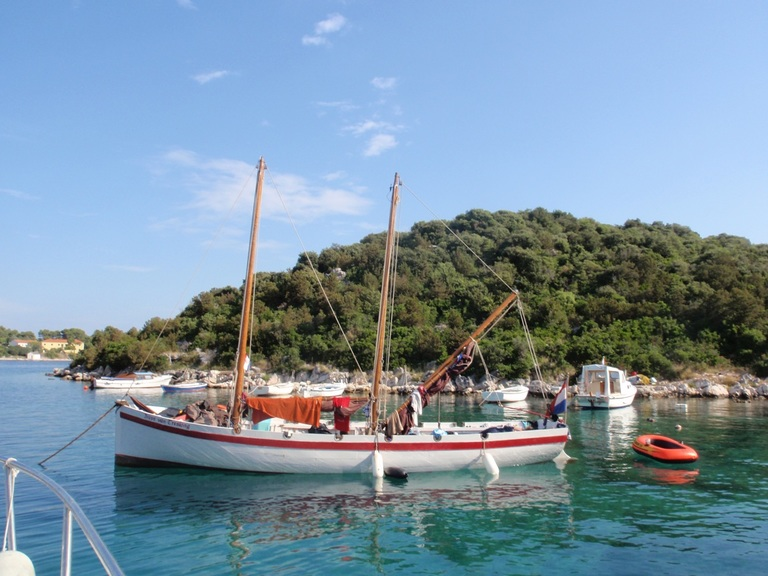

In [2]:
img=load("P8040001a.jpg")

In [3]:
# Opis podataka
typeof(img)

Array{RGB{Normed{UInt8,8}},2}

In [4]:
img[1,1]

In [5]:
show(img[1,1])

RGB{N0f8}(0.439,0.624,0.843)

In [6]:
# Razdvojimo sliku na R, G i B komponente
channels=channelview(img)

3×576×768 reinterpret(N0f8, ::Array{RGB{N0f8},3}):
[:, :, 1] =
 0.439  0.447  0.439  0.435  0.447  …  0.886  0.886  0.89   0.894  0.894
 0.624  0.631  0.624  0.62   0.631     0.886  0.886  0.89   0.894  0.894
 0.843  0.851  0.843  0.839  0.851     0.847  0.847  0.851  0.855  0.855

[:, :, 2] =
 0.439  0.443  0.443  0.439  0.443  …  0.89   0.89   0.89   0.894  0.894
 0.624  0.627  0.627  0.624  0.627     0.89   0.89   0.89   0.894  0.894
 0.843  0.847  0.847  0.843  0.847     0.851  0.851  0.851  0.855  0.855

[:, :, 3] =
 0.443  0.439  0.447  0.447  0.439  …  0.906  0.898  0.898  0.902  0.902
 0.627  0.624  0.631  0.631  0.624     0.894  0.898  0.898  0.902  0.902
 0.847  0.843  0.851  0.851  0.843     0.859  0.859  0.859  0.863  0.863

...

[:, :, 766] =
 0.62   0.624  0.624  0.624  0.627  …  0.263  0.271  0.302  0.302  0.286
 0.769  0.773  0.773  0.773  0.769     0.443  0.447  0.478  0.478  0.463
 0.953  0.957  0.957  0.957  0.957     0.573  0.569  0.6    0.6    0.584

[:, :, 767] =


In [7]:
Red=channels[1,:,:]
Green=channels[2,:,:]
Blue=channels[3,:,:]

576×768 Array{N0f8,2} with eltype Normed{UInt8,8}:
 0.843  0.843  0.847  0.847  0.847  …  0.949  0.953  0.953  0.965  0.969
 0.851  0.847  0.843  0.839  0.839     0.953  0.957  0.957  0.965  0.965
 0.843  0.847  0.851  0.851  0.851     0.957  0.961  0.957  0.961  0.961
 0.839  0.843  0.851  0.855  0.855     0.957  0.961  0.957  0.961  0.961
 0.851  0.847  0.843  0.839  0.839     0.957  0.957  0.957  0.957  0.953
 0.847  0.847  0.843  0.843  0.843  …  0.953  0.953  0.957  0.957  0.957
 0.839  0.843  0.851  0.855  0.855     0.953  0.957  0.957  0.957  0.957
 0.847  0.847  0.847  0.847  0.851     0.957  0.957  0.957  0.957  0.953
 0.855  0.855  0.855  0.855  0.851     0.949  0.957  0.953  0.953  0.957
 0.855  0.851  0.847  0.847  0.851     0.953  0.965  0.961  0.957  0.961
 0.855  0.851  0.847  0.847  0.851  …  0.953  0.961  0.957  0.957  0.957
 0.859  0.855  0.851  0.851  0.851     0.949  0.961  0.957  0.953  0.953
 0.855  0.855  0.855  0.851  0.851     0.953  0.961  0.961  0.961  0.957


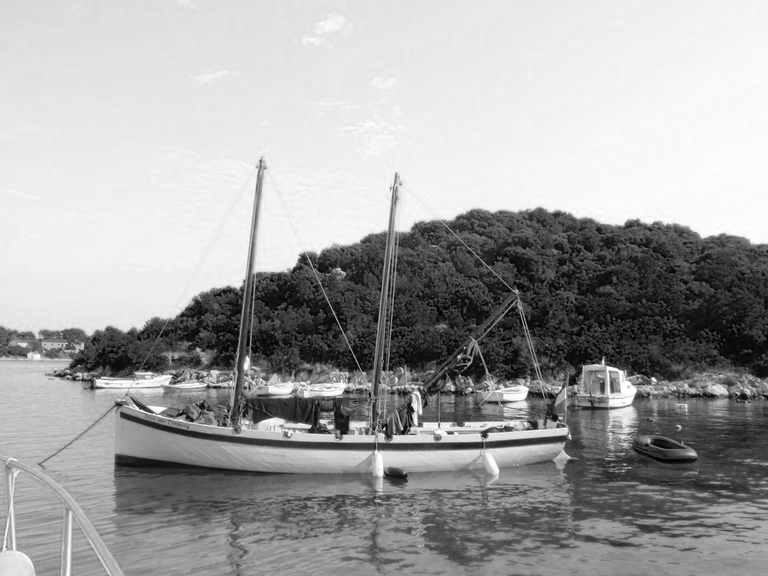

In [8]:
colorview(Gray,Blue)

In [9]:
# Izračunajmo QR rastav s pivotiranjem matrice svakog kanala
R=qr(Red,Val(true))
G=qr(Green,Val(true))
B=qr(Blue,Val(true));

In [10]:
norm(R.Q*R.R[:,invperm(R.p)]-float(Red))

0.00019354107f0

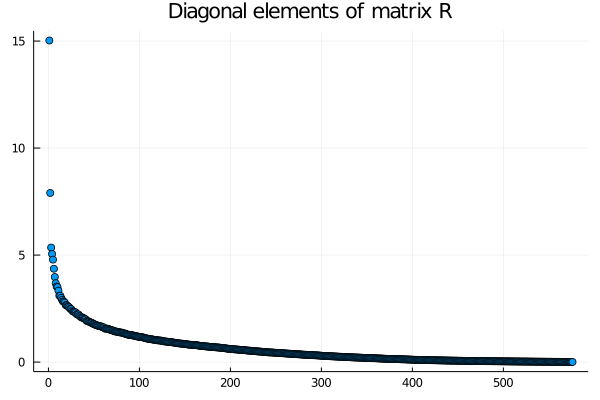

In [11]:
# Nacrtajmo dijagonalne elemente
scatter(1:length(diag(R.R,1)),abs.(diag(R.R)),
    title="Diagonal elements of matrix R",legend=false)

In [12]:
# Izračunajmo komprimirane matrice za svaki kanal, RedC, GreenC i BlueC
# Funkcija Matrix() je nužna radi bržeg generiranja matrice Q
k=50
RedC=Matrix(R.Q)[:,1:k]*R.R[1:k,invperm(R.p)]
GreenC=Matrix(G.Q)[:,1:k]*G.R[1:k,invperm(G.p)]
BlueC=Matrix(B.Q)[:,1:k]*B.R[1:k,invperm(B.p)]

576×768 Array{Float32,2}:
 0.849221  0.849419  0.849613  0.848986  …  0.951224  0.951218  0.952345
 0.850833  0.850977  0.851206  0.850909     0.951578  0.951396  0.951979
 0.854566  0.855033  0.855641  0.854221     0.952285  0.952251  0.954134
 0.856747  0.856969  0.857194  0.85476      0.952852  0.953513  0.954645
 0.860758  0.860862  0.861023  0.859647     0.951365  0.952203  0.954199
 0.859466  0.859761  0.860209  0.860274  …  0.949736  0.949304  0.950518
 0.856315  0.856868  0.857974  0.858545     0.95499   0.953994  0.954867
 0.853424  0.854004  0.854706  0.85662      0.959859  0.958582  0.957889
 0.855778  0.856114  0.856438  0.858546     0.950206  0.948848  0.947465
 0.857619  0.858369  0.858482  0.859991     0.956397  0.954145  0.952858
 0.861171  0.862007  0.862343  0.86251   …  0.953244  0.951111  0.950526
 0.862289  0.863157  0.863619  0.863754     0.949253  0.947282  0.946622
 0.862025  0.862261  0.863018  0.862675     0.952245  0.951357  0.95138
 ⋮                        

In [13]:
norm(Red-RedC)/norm(Red)

0.10522057f0

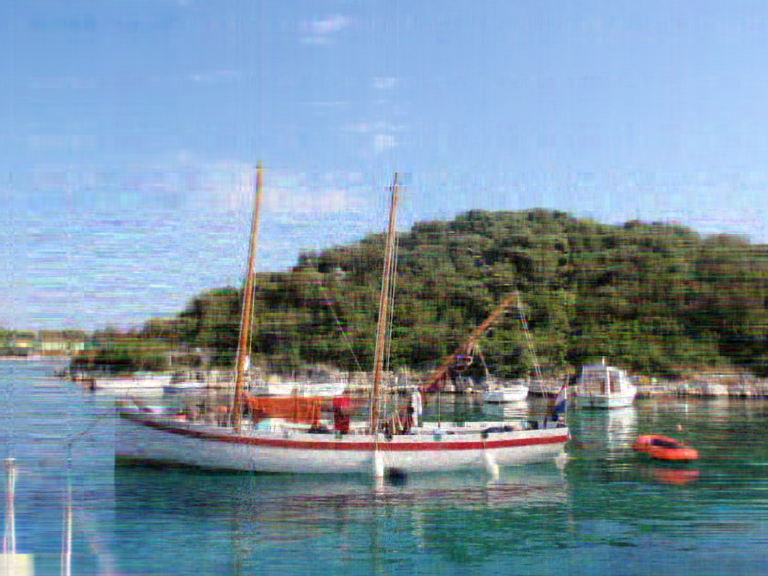

In [14]:
# Nacrtajmo komprimiranu sliku
colorview(RGB, RedC, GreenC, BlueC)

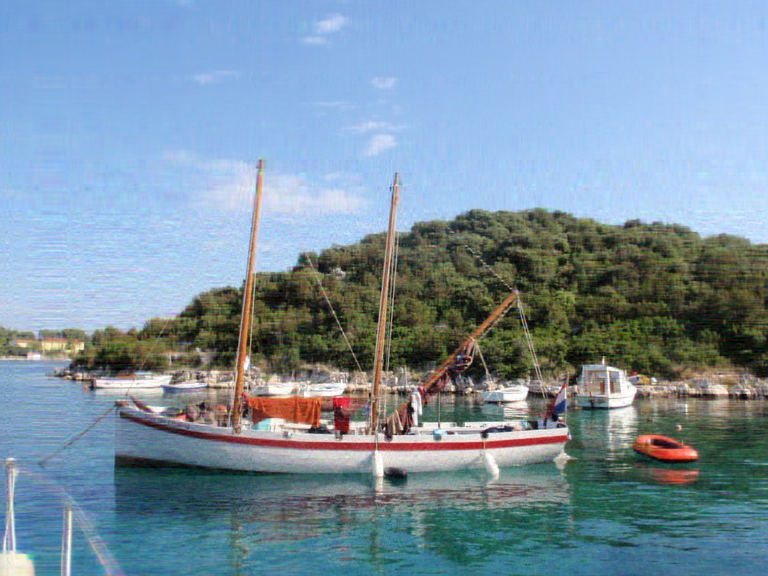

In [15]:
# Pogledajmo kako raste kvalita
k=100
k1=k
k2=k
k3=k
RedC=Matrix(R.Q)[:,1:k1]*R.R[1:k1,invperm(R.p)]
GreenC=Matrix(G.Q)[:,1:k2]*G.R[1:k2,invperm(G.p)]
BlueC=Matrix(B.Q)[:,1:k3]*B.R[1:k3,invperm(B.p)]
colorview(RGB,RedC,GreenC,BlueC)